In [1]:
# ჩვენ ვიმუშავებთ ტიტანიკის მონაცემთა ნაკრებთან.
# შევეცდებით ვიწინასწარმეტყველოთ - გადარჩენა არ გადარჩენის ვარიანტები
# გამოვიყენებთ Titanic მონაცემთა ნაკრების "ნახევრად გაწმენდილ" ვერსიას



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



C:\Users\gstore\AppData\Local\Temp\ipykernel_8736\2775912140.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<Axes: >

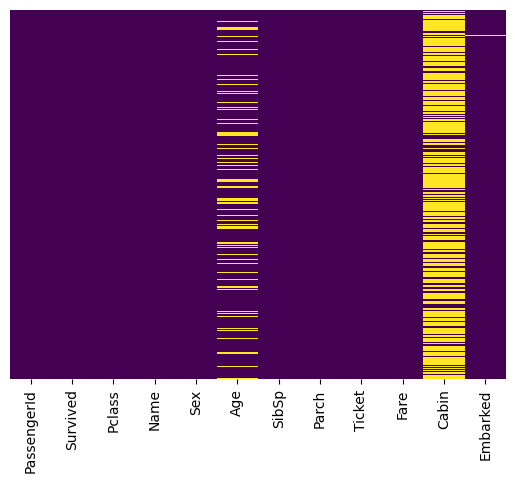

In [5]:
# heatmap შევქმენი ბულიანების True ან False
# ყოველი თვითელი აღნიშნავს True-ს ანუ null-ს
# გვაკლია ბევრი Age ინფომაცია და ძალიან ბევრი Cabin ინფორმაცია
# Age საკმარისია რო დასკვნა დავდოთ აი Cabin ის წაშლა კი შეიძლება მოგვიწიოს

sns.heatmap(train.isnull(),yticklabels = False , cbar = False , cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

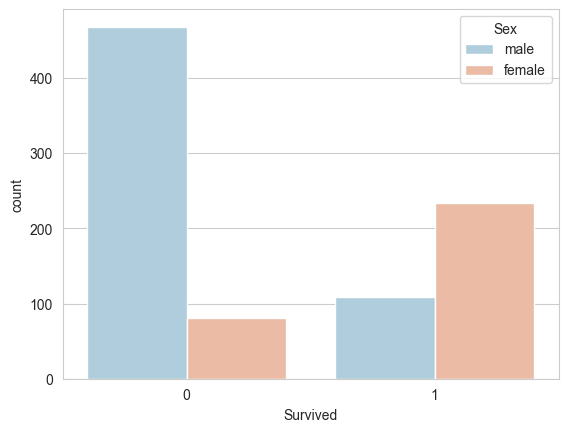

In [6]:
# გადარჩენილი და დაღუპულეი ადამიანების რაოდენობა ორ სვეტად 
# ეს ფუნქცია count ის ვიზუალიზაციისთვის გამოიყენება

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue = 'Sex' ,data=train,palette='RdBu_r')

#sns.countplot(x='Survived',hue = 'Pclass' ,data=train)
#sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)
#train['Age'].hist(bins=30,color='darkred',alpha=0.7)
#sns.countplot(x='SibSp',data=train)
#train['Fare'].hist(color='green',bins=40,figsize=(8,4))

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

<Axes: xlabel='Pclass', ylabel='Age'>

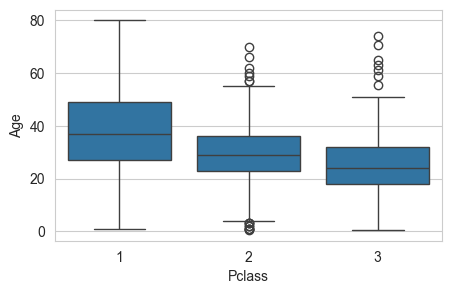

In [5]:
# გავარკვიე რა და როგორ კლასებად იყოფიან passenger ები age ის მიხედვით.
# რადგან სამი კლასი გვაქვს შემდგომ ფუნქციას ამის მიხედვით დავწერთ
# კლასებია დაახლოებით 24 , 29 , 37

plt.figure(figsize=(5, 3))
sns.boxplot(x='Pclass',y='Age',data=train)

In [7]:
# impute_age ფუნქციის მიზანი Age ის გამოტოვებული ველების შევსებაა
# cols იქნება ორ ცვლადიანი array პირველი col[0] ასაკი და col[1] კლასი
# ცარიელ Age ებს კლასების მიხედვით მივანიჭებთ შესაბამის მნიშვნელობებს 
# თუ არ იყო ცარიელი არჩება რა Age ქონდა ის

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):     
        if Pclass == 1 :
            return 37
        elif Pclass == 2 :
            return 29
        else:
            return 24
    else:
        return Age

In [8]:
# გამოვიყენოთ ეს ფუნქცია
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\gstore\AppData\Local\Temp\ipykernel_1592\1210260623.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\gstore\AppData\Local\Temp\ipykernel_1592\1210260623.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

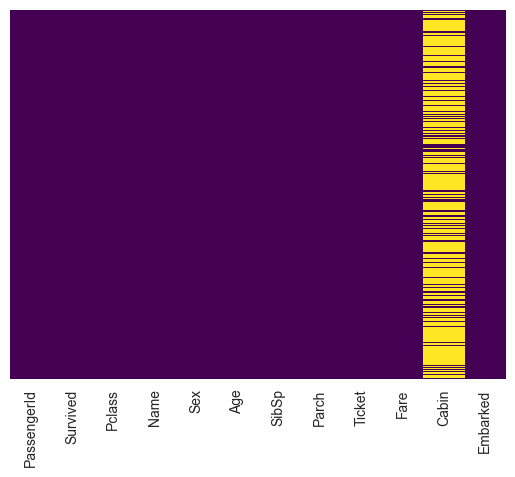

In [9]:
# Age ის ნულები აღარ გვაქვს :)

sns.heatmap(train.isnull(),yticklabels = False , cbar = False , cmap='viridis')

In [10]:
# ახლა Cabin 
# რეალურად იმდენი ნულია აზრი არ აქვს გამოყენებას ამიტომ სჯობს წაიშლოს

train.drop('Cabin',axis=1,inplace=True)

In [11]:
# Cabin ფაფუ :)

train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [12]:
# გადავაზღვიოთ და სადმე თუ ერთი ორი ნულია წავშალოთ ის row
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [13]:
# მაგალითად sex ში male და female მანქანური ენისთვის გაუგებარია გადავიყვანოთ 1 და 0 ებად
# იგივე ეხება Embarked ველს
# არის column ები ფიზიკურად ვერ უზავ ვერაფერს Name ან Ticket მაგრამ ამ ველებს არც გამოვიყენებთ

# drop_first=True აუცილებელია გაურკვევლობა რო აიცილო , ერთ ქოლუმს ტოვებ და იქ წერია 1 ან 0  
sex = pd.get_dummies(train['Sex'],drop_first=True).add(0)
embark = pd.get_dummies(train['Embarked'],drop_first=True).add(0)

In [14]:
sex.head(3)

,male
0,1
1,0
2,0


In [15]:
embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [16]:
# მოდი ძველი ცხრილი და ეს ახალი column ები შევაერთოთ

train = pd.concat([train,sex,embark],axis = 1)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1


In [17]:
# აღარ გვჭირდება ძველი sex და embarked სვეტები
# ვერც Name და Ticket გამოვიყენებთ მიზნისთვის
# axis = 1 სვეტები რო წავშალოთ

train.drop(['Sex','Embarked','Name','Ticket'],axis = 1,inplace = True)

In [18]:
train.drop('PassengerId',axis = 1,inplace = True)

In [19]:
# ვსოოოოოო Data მზად არის 

train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [23]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

## Training and Predicting

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logmodel = LogisticRegression()

In [27]:
logmodel.fit(X_train,y_train)

C:\Users\gstore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
predictions = logmodel.predict(X_test)

## Evaluation

We can check precision ,recall , f1-score using classification report!

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



Not so bad!